In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('text',usetex=True)
cmap = matplotlib.cm.get_cmap('Dark2')
colors = cmap(np.linspace(0,1,6))
import glob
from plotting import *
from physics import Disk, Particle
import pickle as pkl
%matplotlib inline

## Initial Setup

Finished initializing disk with paramters (N,R,c,Mh) = (300,1,0.05,0)
Finished initializing velocities, outermost particle has an orbital period of 0.291


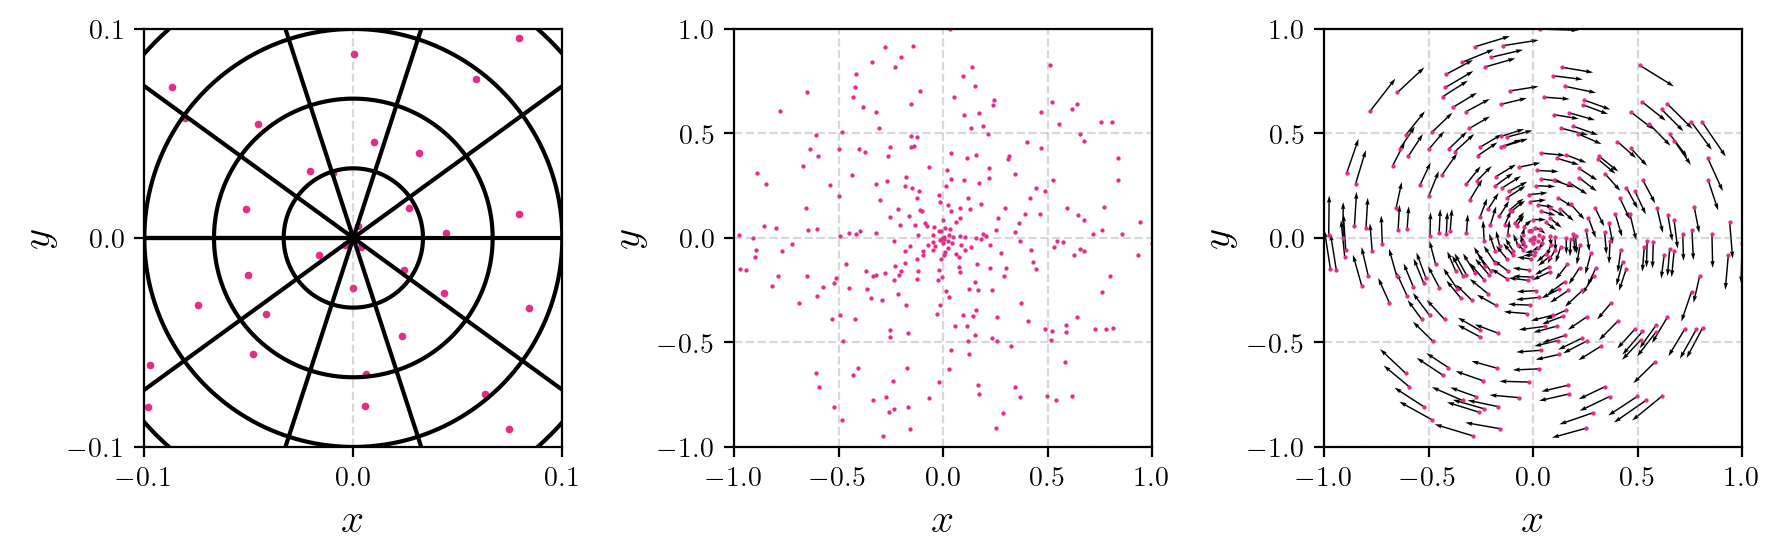

In [2]:
seed = 0; outdir = '/home/pdave/cosmo/disk_out/'
dpi = 200 # dpi for figures
rss = np.random.RandomState(seed)
# 300 particles, disk radius = 1, softening length of 0.05, mass of halo = 0
N, R, c, Mh = 300, 1, 0.05, 0
d = Disk(N,R,c,Mh,rss)
d.init_velocities()
fig,ax = inspect_grid(d,dpi)

## Dispersion distribution

Finished adding dispersion, outermost particle has an orbital period of 0.335


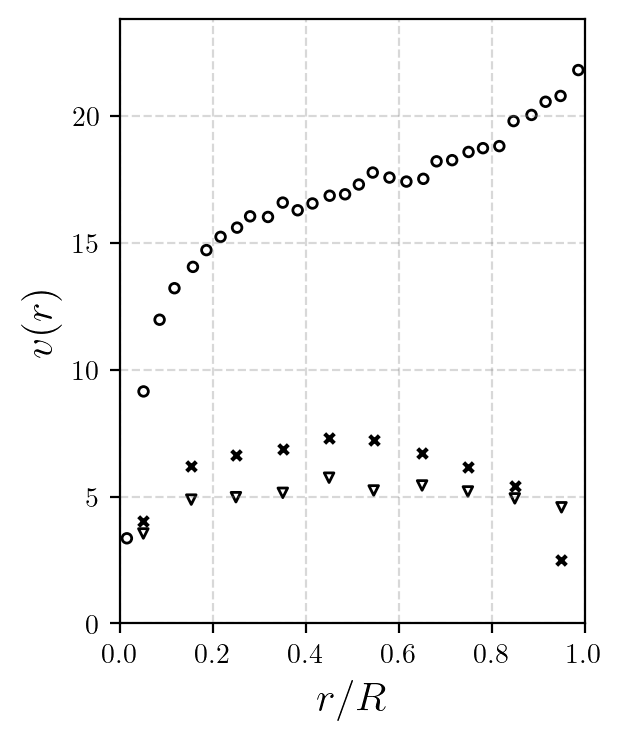

In [3]:
d.add_dispersion()
fig,ax = plot_disp(d,dpi)

## Velocity distributions

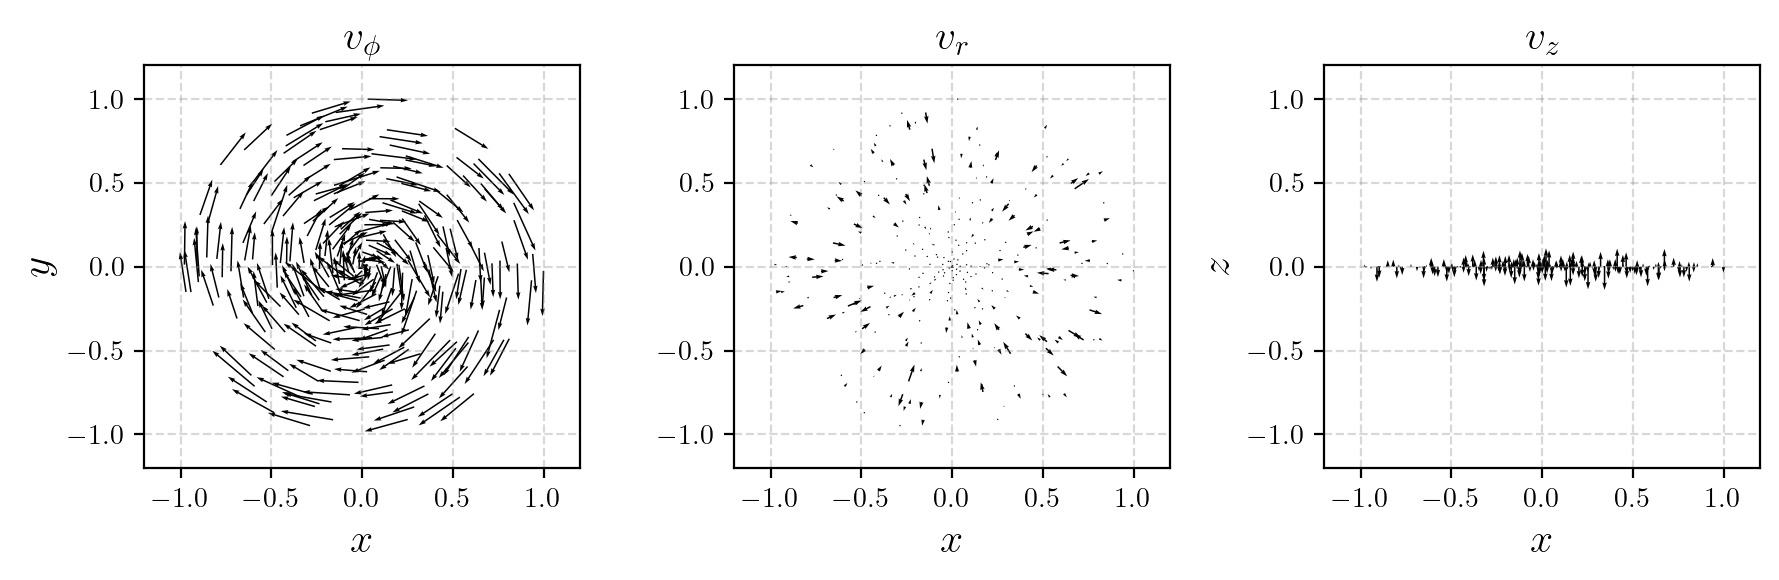

In [4]:
fig,ax = plot_vels(d,dpi)

## Initial scalars

For a binning of $\Delta r = 0.1$, the mean rotational kinetic energy is given by:
$T_\mathrm{mean} = \frac{1}{2} \Sigma_\alpha n_\alpha v_\alpha^2$

$t_\mathrm{mean} = T_\mathrm{mean}/|W|$, is the Ostriker & Peebles '73 t-parameter, where $|W|$ is the magnitude of the sum of the potential energies of interaction of the particles in the field of the halo and the self-energy of the halo

$z_\mathrm{rms}$ is the root mean square z-position of all the particles, which initially should be zero

$\vec{r}_\mathrm{cm}$ is the center of mass of the particles, which should be close to zero

$\tau$ is the orbital period of the outermost particle, assuming circular orbit

In [5]:
print("total rotational KE: {:.1e}".format(d.totKE))
print("sum of magnitudes of PE: {:.1e}".format(d.totPE))
print("tmean, ratio of the two energies: {:.2f}".format(d.tmean))
print("root-mean-square z: {:.2f}".format(d.zrms))
print("center of mass of grid: [{:.2e},{:.2e},{:.2e}]".format(d.com[0],d.com[1],d.com[2]))
print("tau: {:.2f}".format(d.tau))

total rotational KE: 3.8e+04
sum of magnitudes of PE: 1.0e+05
tmean, ratio of the two energies: 0.38
root-mean-square z: 0.00
center of mass of grid: [-2.39e-03,-2.92e-03,0.00e+00]
tau: 0.34


## Simulating disk in time

In [6]:
dt = d.maxdt()/10
#d.sim(tau_max=1,dt=dt,outdir=outdir,verbose=False)

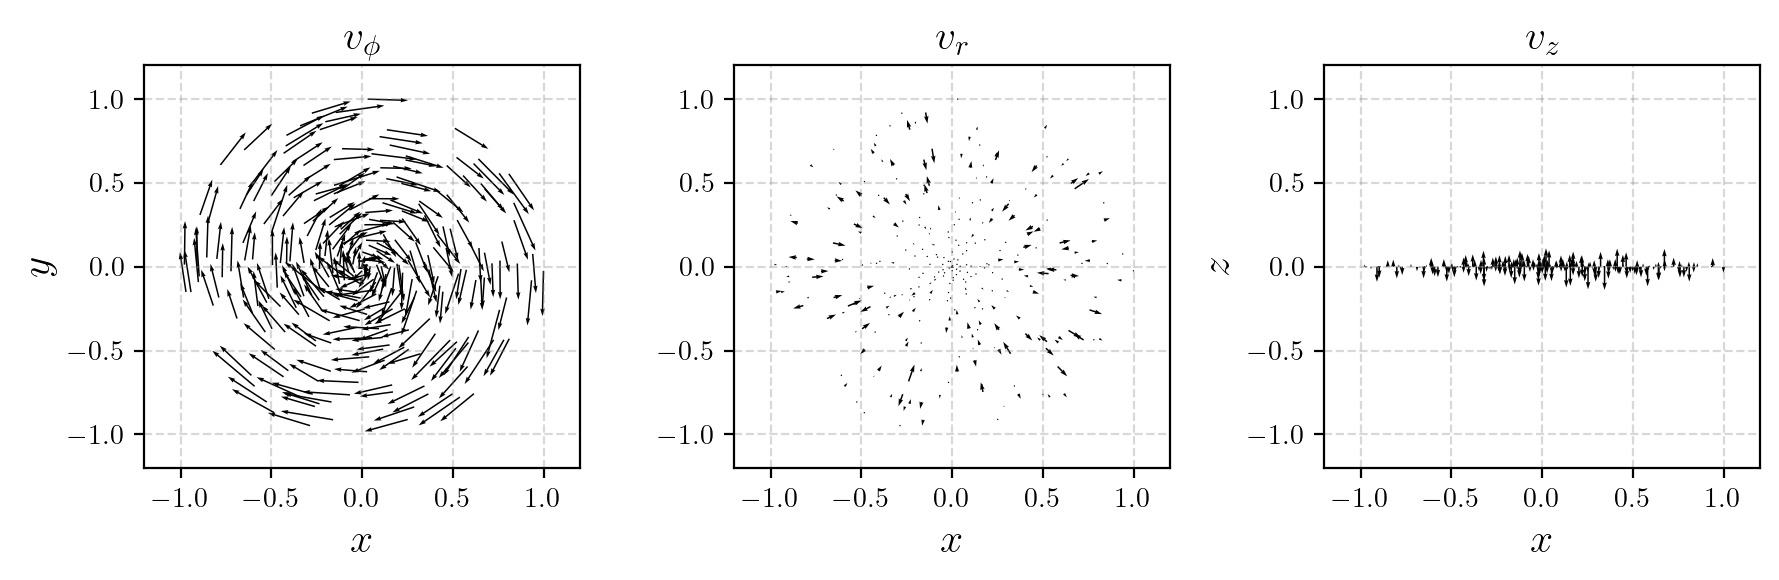

In [7]:
fig,ax = plot_vels(d,dpi)

In [8]:
#plot_dumps(R,c,Mh,N)

In [9]:
#dump_scalars(R,c,Mh,N)

In [10]:
o = np.load(outdir+'scalars_R_1.0_c_0.05_Mh_0_N_300.npy')
t = np.linspace(0,0.335,len(o))

In [11]:
tau = t/0.34

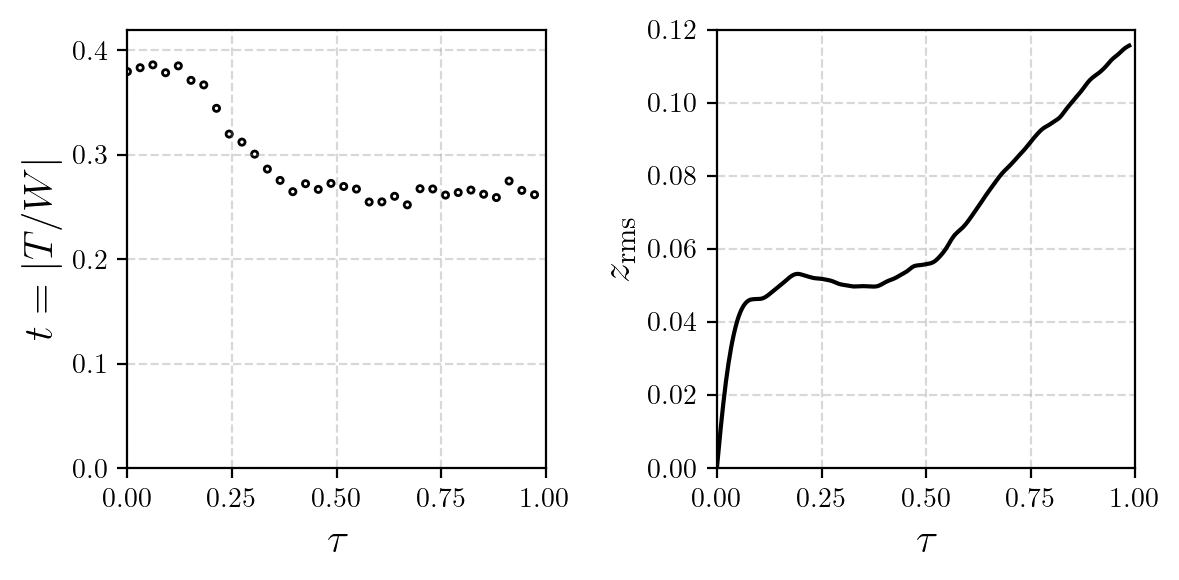

In [12]:
fig,axes = plt.subplots(1,2,figsize=(6,3),dpi=200,facecolor='white')
m = [i%10==0 for i in range(len(o))]
axes[0].scatter(tau[m],o['tmean'][m],edgecolor='k',facecolor='none',s=5)
axes[0].set_ylim(0,0.42)
axes[0].set_ylabel('$t=|T/W|$',size=15)
axes[1].plot(tau,o['zrms'],'k')
axes[1].set_ylim(0,0.12)
axes[1].set_ylabel('$z_\mathrm{rms}$',size=15)
for ax in axes:
    ax.set_xlim(0,1)
    ax.grid(color='gray',linestyle='dashed',alpha=0.3)
    ax.set_xlabel(r'$\tau$',size=15)
    ax.set_xticks(np.linspace(0,1,5))
plt.tight_layout()